In [15]:
%matplotlib inline
# code from https://docs.scipy.org/doc/scipy/tutorial/special.html
from scipy import special
import numpy as np

In [13]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])


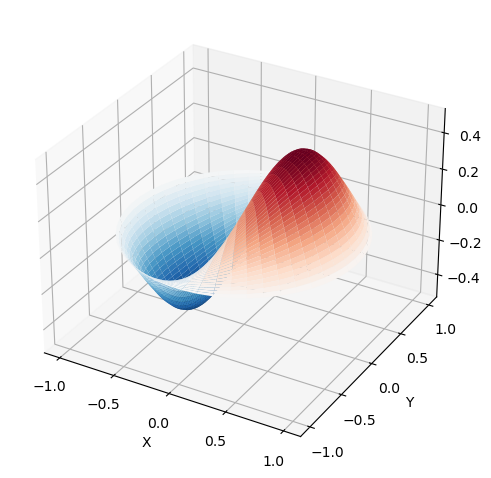

In [18]:
# plot
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()


# Optimization

In [ ]:
from scipy.optimize import  minimize

Minimize $f(x)=(x-3)^2$

In [ ]:
def f(x):
    return (x-3)**2

res = minimize(f, 2)
res.x


Minimise $f(x,y)=(x-1)^2+(y-2.5)^2$ subject to
$$ x-2y+2\geq 0\\ -x-2y+6\geq 0\\-x+2y+2\geq 0\\ x\geq 0\\ y\geq 0$$

In [ ]:
def f(x): return (x[0]-1)**2+(x[1]-2.5)**2


cons = (
    {'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
    {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
    {'type': 'ineq', 'fun': lambda x: -x[0]+2*x[1]+2},
)
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)
res.x


# Special function

In [ ]:
help(special.exp2)

In [ ]:
print(special.exp2(2))
print(special.cosdg(90))
print(special.exp10(2))


# Integration

In [ ]:
from scipy import integrate
help(integrate.quad)

In [ ]:
integrate.quad(lambda x: special.exp10(x), 0, 1)


In [ ]:
help(integrate.dblquad)


In [ ]:
def e(x, y): return x*y**2
def f(x): return 1
def g(x): return -1


integrate.dblquad(e, 0, 2, f, g)


# Fourier Transformations


In [ ]:
from scipy.fftpack import fft, ifft
import numpy as np
help(fft)


In [ ]:
x = np.array([1, 2, 3, 4])
fft(x)

# Linear Algebra

In [ ]:
from scipy import  linalg
help(linalg)


In [ ]:
a = np.array([[1, 2], [3, 4]])
linalg.inv(a)


# Interpolation Functions

In [ ]:
from scipy import interpolate
help(interpolate)

In [ ]:
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
y1 = f(x1)
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()
